<a href="https://colab.research.google.com/github/takakurahashi/github.io/blob/master/GAFA%E6%A0%AA%E6%8E%A8%E7%A7%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 必要なライブラリをimport
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセット。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Yahooからデータを読み込めるようにする
#from pandas.io.data import DataReader
import pandas_datareader as pdd

# 日付けと時刻を扱うモジュール
from datetime import datetime

# ローソクチャートのための読み込み
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF

In [13]:
data = []
# 所謂ハイテク企業の証券コード（アルファベットで表記）指定
tech_list = ['AAPL','GOOG','FB','AMZN']

# 直近1年間のデータを取得
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# それぞれの企業ごとに、Yahooのサイトからデータを取得
for stock in tech_list:   
    # for文でそれぞれの名前でDataFrameを作成
    # stockはtech_listで指定した値、'yahoo'は情報入手先、以降は時間指定
    data.append(pdd.DataReader(stock,'yahoo',start,end))
    

In [14]:
# データの概観を掴むことができる
data[0].describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,82.208686,79.984664,81.060435,81.193952,1.343067e+08,80.892294
std,19.327577,18.466118,19.082557,18.885079,5.614725e+07,19.038196
min,55.240002,53.152500,54.607498,54.740002,4.199410e+07,54.202213
25%,67.062500,65.752502,66.449997,66.592499,9.565440e+07,66.243423
50%,77.942497,76.072502,76.809998,77.377502,1.248144e+08,76.847343
75%,92.617500,90.567497,91.250000,91.209999,1.622340e+08,91.045845
max,137.979996,130.529999,137.589996,134.179993,3.743368e+08,134.179993


In [15]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-01 to 2020-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


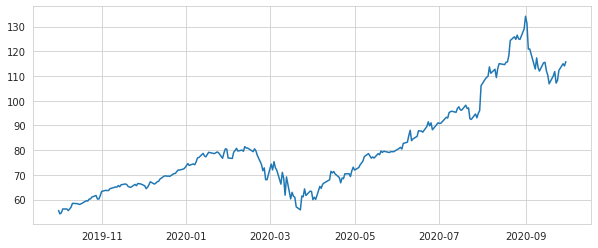

In [16]:
plt.figure(figsize=(10,4))
plt.plot(data[0]['Adj Close'])
# plt.legend=True

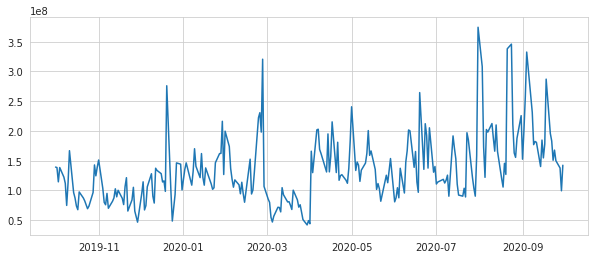

In [17]:
plt.figure(figsize=(10,4))
plt.plot(data[0]['Volume'])
plt.legend=True

In [18]:
# 間隔ごとに移動平均を描く
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    data[0][column_name] = data[0]['Adj Close'].rolling(window=ma).mean()

In [19]:
data[0]

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200.0,55.595886,NaN,NaN,NaN
2019-10-02,55.895000,54.482498,55.764999,54.740002,138449200.0,54.202213,NaN,NaN,NaN
2019-10-03,55.240002,53.782501,54.607498,55.205002,114426000.0,54.662643,NaN,NaN,NaN
2019-10-04,56.872501,55.972500,56.410000,56.752499,138478800.0,56.194942,NaN,NaN,NaN
2019-10-07,57.482498,56.459999,56.567501,56.764999,122306000.0,56.207317,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-09-24,110.250000,105.000000,105.169998,108.220001,167743300.0,108.220001,110.943999,116.967374,111.547991
2020-09-25,112.440002,107.669998,108.430000,112.279999,149981400.0,112.279999,110.971999,116.330873,111.866615
2020-09-28,115.320000,112.779999,115.010002,114.959999,137672400.0,114.959999,110.931999,115.838498,112.242733


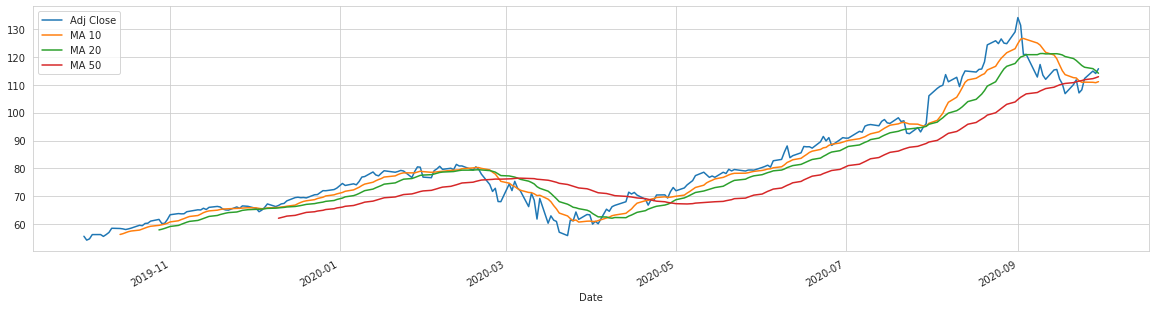

In [20]:
data[0][['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(20,5))

In [21]:
data[0]['Daily Return'] = data[0]['Adj Close'].pct_change()
data[0] # Daily Return結果が追加

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200.0,55.595886,NaN,NaN,NaN,NaN
2019-10-02,55.895000,54.482498,55.764999,54.740002,138449200.0,54.202213,NaN,NaN,NaN,-0.025068
2019-10-03,55.240002,53.782501,54.607498,55.205002,114426000.0,54.662643,NaN,NaN,NaN,0.008495
2019-10-04,56.872501,55.972500,56.410000,56.752499,138478800.0,56.194942,NaN,NaN,NaN,0.028032
2019-10-07,57.482498,56.459999,56.567501,56.764999,122306000.0,56.207317,NaN,NaN,NaN,0.000220
...,...,...,...,...,...,...,...,...,...,...
2020-09-24,110.250000,105.000000,105.169998,108.220001,167743300.0,108.220001,110.943999,116.967374,111.547991,0.010269
2020-09-25,112.440002,107.669998,108.430000,112.279999,149981400.0,112.279999,110.971999,116.330873,111.866615,0.037516
2020-09-28,115.320000,112.779999,115.010002,114.959999,137672400.0,114.959999,110.931999,115.838498,112.242733,0.023869


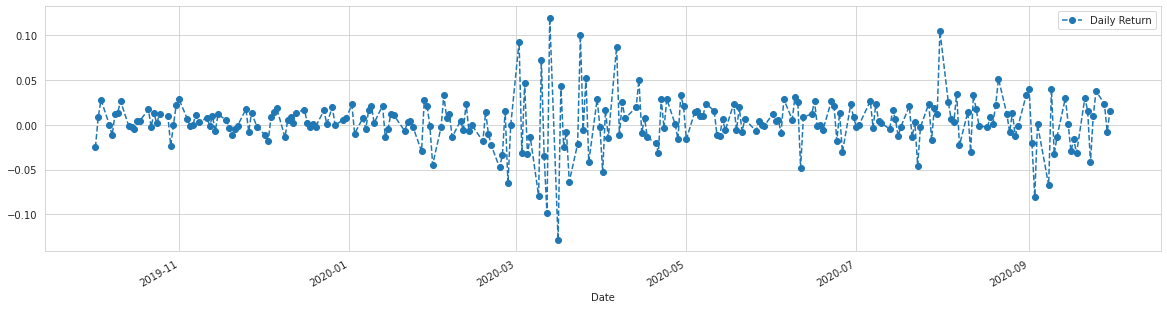

In [22]:
# 変化率をプロット
data[0]['Daily Return'].plot(figsize=(20,5),legend=True,linestyle='--',marker='o')